In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df2 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [ ]:
df3.shape

(13246, 5)

In [ ]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
df3 = df3.drop(['size'], axis = 'columns')
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [ ]:
df3[df3.bhk > 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df3[~df3.total_sqft.apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1])) / 2
  try:
    return float(x)
  except:
    return None

In [ ]:
convert_sqft_to_num('2100-2500')

2300.0

In [ ]:
convert_sqft_to_num('4523sQ. Meter')

In [ ]:
df4 = df3.copy()

In [ ]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [ ]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
df5 = df4.copy()

In [ ]:
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(location_stats[location_stats <= 10])

1052

In [ ]:
location_less_than_10 = location_stats[location_stats <= 10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df5.location.unique())

1293

In [ ]:
df5.location = df5.location.apply(lambda x: 'Other' if x in location_less_than_10 else x)

In [ ]:
len(df5.location.unique())

242

In [ ]:
df5.head(20)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df5[df5.total_sqft / df5.bhk < 300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,Other,1400.0,7.0,218.0,7,15571.428571
13279,Other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [ ]:
df5.shape

(13246, 6)

In [ ]:
df6 = df5.copy()

In [ ]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12502, 6)

In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def pps(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    df_reduced = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
    df_out = pd.concat([df_out, df_reduced], ignore_index=True)
  return df_out

In [ ]:
df7 = pps(df6)
df7.shape

(10241, 6)

In [ ]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2Bhk', s = 50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color = 'red', marker = '+', label = '3Bhk', s = 50)
  plt.xlabel('Total Sq Feet')
  plt.ylabel('Price')
  plt.title('Location')
  plt.legend()

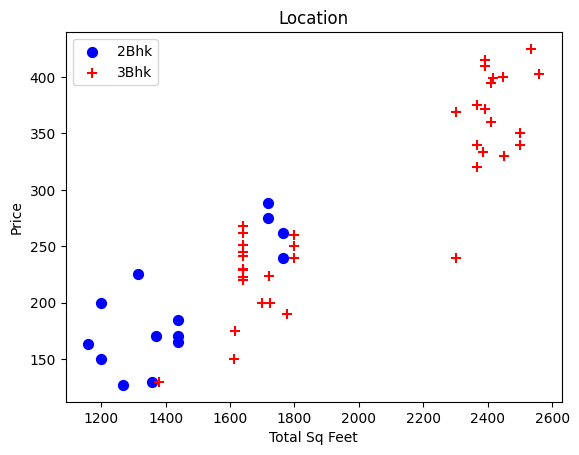

In [ ]:
plot_scatter_chart(df7, 'Rajaji Nagar')

In [ ]:
df7.shape

(10241, 6)

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean' : np.mean(bhk_df['price_per_sqft']),
          'std' : np.std(bhk_df['price_per_sqft']),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk - 1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

In [ ]:
dff = remove_bhk_outliers(df7)
dff.shape

(7329, 6)

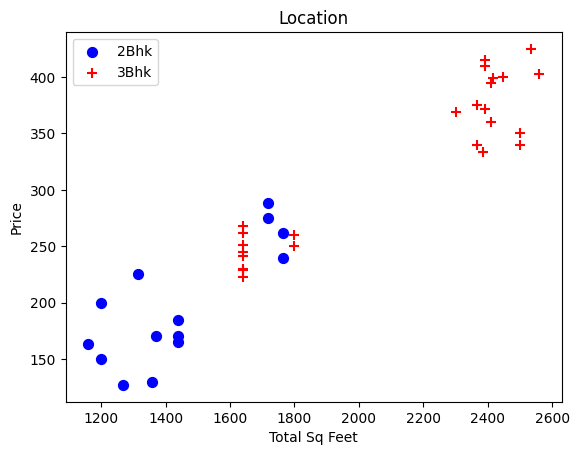

In [ ]:
plot_scatter_chart(dff, 'Rajaji Nagar')

In [ ]:
plt.hist(dff['price_per_sqft'], rwidth = 0.8)
plt.xlabel('Price Per Sq Feet')
plt.ylabel('Count')

In [ ]:
dff.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
dff[dff.bath >= dff.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,2400.0,8.0,450.0,6,18750.000000
530,Arekere,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...
9414,Vijayanagar,2100.0,6.0,252.0,4,12000.000000
9568,Whitefield,3850.0,5.0,316.0,3,8207.792208
9632,Whitefield,2700.0,5.0,175.0,3,6481.481481
9726,Whitefield,4003.0,6.0,300.0,4,7494.379216


In [ ]:
dff2 = dff[dff.bath < (dff.bhk + 2)]
dff2

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2,8368.200837
10231,Yeshwanthpur,1692.0,3.0,108.0,3,6382.978723
10233,Yeshwanthpur,2500.0,5.0,185.0,6,7400.000000
10238,Yeshwanthpur,1855.0,3.0,135.0,3,7277.628032


In [ ]:
dff3 = dff2.drop(['price_per_sqft'], axis = 'columns')
dff3

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10230,Yeshwanthpur,1195.0,2.0,100.0,2
10231,Yeshwanthpur,1692.0,3.0,108.0,3
10233,Yeshwanthpur,2500.0,5.0,185.0,6
10238,Yeshwanthpur,1855.0,3.0,135.0,3


In [ ]:
dff3.location.nunique()

242

In [ ]:
dummies = pd.get_dummies(dff3.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dff4 = pd.concat([dff3, dummies.drop(['Other'], axis = 'columns')], axis = 'columns')
dff5 = dff4.drop(['location'], axis = 'columns')
dff5

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1195.0,2.0,100.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,1692.0,3.0,108.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,2500.0,5.0,185.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,1855.0,3.0,135.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = dff5.drop(['price'], axis = 'columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,1195.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,1692.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,2500.0,5.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,1855.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = dff5.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10230    100.0
10231    108.0
10233    185.0
10238    135.0
10239    160.0
Name: price, Length: 7251, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

print(len(x_train))
print(len(x_test))

5800
1451


In [17]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.score(x_test, y_test)

0.8691914452174364

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(LinearRegression(), x, y, cv = 5)
scores

array([-6.37801135e+15, -1.02148857e+16,  5.91754083e-01,  7.60043153e-01,
        6.14095766e-01])

In [15]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [ ]:
def finding_best_algo(x, y):
  algos = {
      'linear_regression' : {
          'model' : LinearRegression(),
          'params' : {
              'fit_intercept' : [True, False]
          }
      },
      'decision_tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['mse', 'friedman_mse'],
              'splitter' : ['best', 'random']
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha': [1, 2],
              'selection' : ['random', 'cyclic']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)

  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
    gs.fit(x, y)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores, columns = ['model', 'best_params', 'best_score'])

In [ ]:
final = finding_best_algo(x, y)
final

,model,best_params,best_score
0,linear_regression,{'fit_intercept': False},0.854653
1,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.722686
2,lasso,"{'alpha': 1, 'selection': 'random'}",0.709300


In [ ]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
def predict_prices(location, sqft, bhk, bath):
  loc_index = np.where(x.columns == location)[0][0]
  tp = np.zeros(len(x.columns))
  tp[0] = sqft
  tp[1] = bath
  tp[2] = bhk
  if loc_index >= 3:
    tp[loc_index] = 1
  return lr.predict([tp])[0]

In [ ]:
predict_prices('1st Phase JP Nagar', 1000, 3, 3)

81.13648221357968

In [ ]:
predict_prices('1st Phase JP Nagar', 1000, 2, 2)

82.8198103134803

In [ ]:
predict_prices('Indira Nagar', 1000, 2, 2)

179.37066882807488

In [12]:
import joblib

In [ ]:
joblib.dump(lr, 'banglore_house_price_prediction.pkl')

['banglore_house_price_prediction.pkl']

In [ ]:
import json

In [ ]:
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}

with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))